In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')
#df_test['Loan Status'] = 0

- cross validation 
- plots 


In [4]:
df_quan = df.drop(df.select_dtypes('object').columns, axis=1)
#df_quan_test = df_test.drop(df_test.select_dtypes('object').columns, axis=1)

df_quan.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0


In [5]:
df_quan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Interest Rate                 67463 non-null  float64
 6   Home Ownership                67463 non-null  float64
 7   Debit to Income               67463 non-null  float64
 8   Delinquency - two years       67463 non-null  int64  
 9   Inquires - six months         67463 non-null  int64  
 10  Open Account                  67463 non-null  int64  
 11  Public Record                 67463 non-null  int64  
 12  Revolving Balance             67463 non-null  int64  
 13  R

In [6]:
df_quan['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

### DataPrep
- onehot encoding 
- single column encoding

In [7]:
#onehot encoding
def prep(df):
    df = pd.concat([df, pd.get_dummies(df['Batch Enrolled'])], axis=1)
    df = df.drop('Batch Enrolled' ,axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Grade'])], axis=1)
    df = df.drop('Grade', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Sub Grade'])], axis=1)
    df = df.drop('Sub Grade', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Employment Duration'])], axis=1)
    df = df.drop('Employment Duration', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Verification Status'])], axis=1)
    df = df.drop('Verification Status', axis = 1)



    df = pd.concat([df, pd.get_dummies(df['Payment Plan'])], axis=1)
    df = df.drop('Payment Plan', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Loan Title'])], axis=1)
    df = df.drop('Loan Title', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Initial List Status'])], axis=1)
    df = df.drop('Initial List Status', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Application Type'])], axis=1)
    df = df.drop('Application Type', axis = 1)
    return df

In [8]:
df_quan.corr()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.003480,-0.003302,0.002954,0.003226,0.004258,-0.004390,-0.010578,0.000568,-0.006628,...,0.006674,-0.001435,-0.001802,-0.002900,0.000907,NaN,0.003745,-0.003572,-0.005141,0.000472
Loan Amount,-0.003480,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,...,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,NaN,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.003302,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,...,0.001542,0.000462,0.000175,0.001071,-0.003476,NaN,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002954,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,...,-0.000232,0.000966,-0.007272,0.001814,0.004248,NaN,0.006862,0.003283,0.005669,-0.000091
Term,0.003226,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,...,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,NaN,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,0.004258,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,...,0.003119,0.009348,0.001281,-0.009895,-0.012652,NaN,0.002771,-0.002567,0.016651,0.002900
Home Ownership,-0.004390,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,...,0.004011,0.004399,-0.003821,-0.002639,-0.004573,NaN,0.006314,0.007117,0.005008,0.003716
Debit to Income,-0.010578,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,...,-0.010224,-0.009693,0.002200,-0.000716,0.008639,NaN,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,0.000568,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,...,0.007943,0.017348,0.002707,0.003451,0.001160,NaN,0.005642,0.002602,0.009315,0.009990
Inquires - six months,-0.006628,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,...,0.008296,0.012487,0.008388,-0.004436,-0.004453,NaN,-0.002210,0.001531,0.004678,0.000578


C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='ID', ylabel='ID'>,
        <AxesSubplot:xlabel='Loan Amount', ylabel='ID'>,
        <AxesSubplot:xlabel='Funded Amount', ylabel='ID'>,
        <AxesSubplot:xlabel='Funded Amount Investor', ylabel='ID'>,
        <AxesSubplot:xlabel='Term', ylabel='ID'>,
        <AxesSubplot:xlabel='Interest Rate', ylabel='ID'>,
        <AxesSubplot:xlabel='Home Ownership', ylabel='ID'>,
        <AxesSubplot:xlabel='Debit to Income', ylabel='ID'>,
        <AxesSubplot:xlabel='Delinquency - two years', ylabel='ID'>,
        <AxesSubplot:xlabel='Inquires - six months', ylabel='ID'>,
        <AxesSubplot:xlabel='Open Account', ylabel='ID'>,
        <AxesSubplot:xlabel='Public Record', ylabel='ID'>,
        <AxesSubplot:xlabel='Revolving Balance', ylabel='ID'>,
        <AxesSubplot:xlabel='Revolving Utilities', ylabel='ID'>,
        <AxesSubplot:xlabel='Total Accounts', ylabel='ID'>,
        <AxesSubplot:xlabel='Total Received Interest', ylabel='ID'>,
        <AxesSubplot:xlabel=

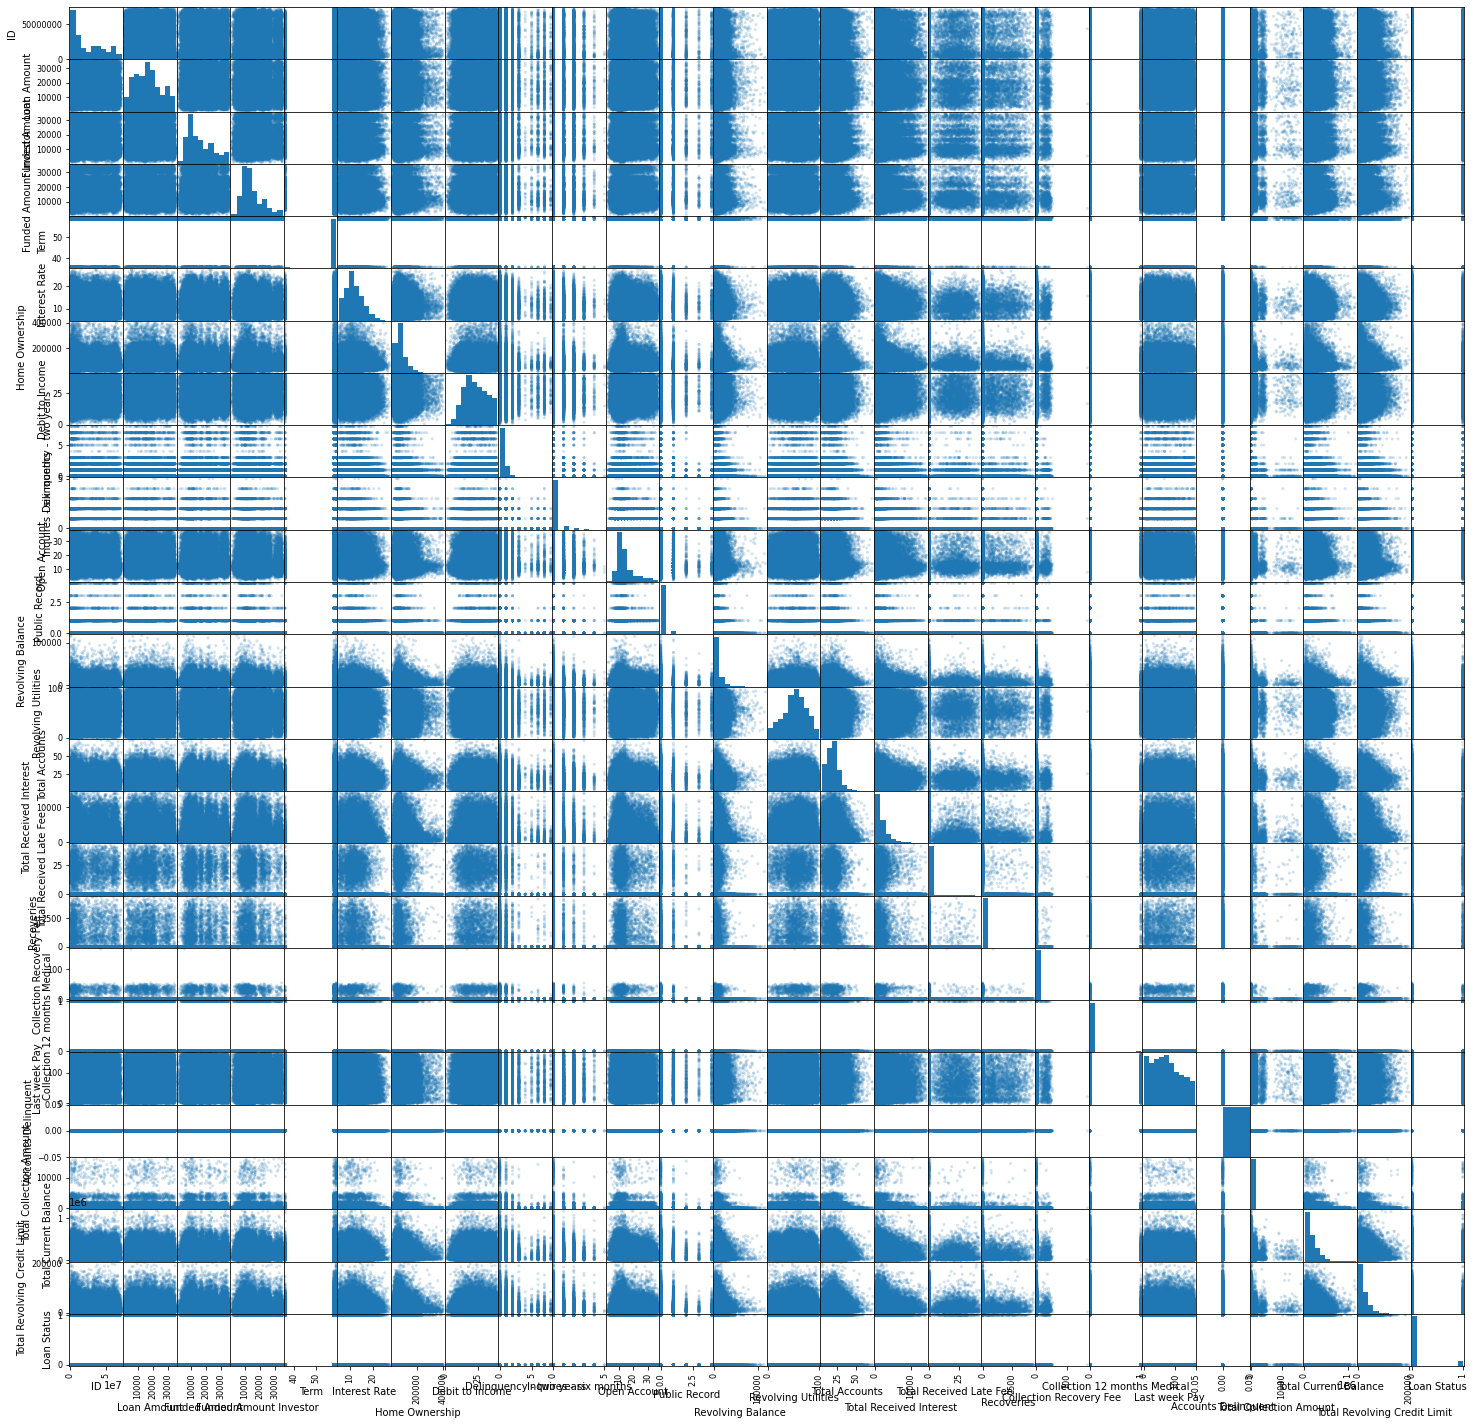

In [9]:
pd.plotting.scatter_matrix(df_quan, alpha=0.2,figsize=(25,25))

### DataPrep
- onehot encoding 
- single column encoding

In [10]:
#onehot encoding
def prep(df):
    df = pd.concat([df, pd.get_dummies(df['Batch Enrolled'])], axis=1)
    df = df.drop('Batch Enrolled' ,axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Grade'])], axis=1)
    df = df.drop('Grade', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Sub Grade'])], axis=1)
    df = df.drop('Sub Grade', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Employment Duration'])], axis=1)
    df = df.drop('Employment Duration', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Verification Status'])], axis=1)
    df = df.drop('Verification Status', axis = 1)



    df = pd.concat([df, pd.get_dummies(df['Payment Plan'])], axis=1)
    df = df.drop('Payment Plan', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Loan Title'])], axis=1)
    df = df.drop('Loan Title', axis = 1)


    df = pd.concat([df, pd.get_dummies(df['Initial List Status'])], axis=1)
    df = df.drop('Initial List Status', axis = 1)

    df = pd.concat([df, pd.get_dummies(df['Application Type'])], axis=1)
    df = df.drop('Application Type', axis = 1)
    return df

In [11]:
df = prep(df)
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,pay off bills,payoff,personal,refi,relief,vacation,f,w,INDIVIDUAL,JOINT
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,...,0,0,0,0,0,0,0,1,1,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,...,0,0,0,0,0,0,0,1,1,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,...,0,0,0,0,0,0,0,1,1,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,...,0,0,0,0,0,0,0,1,1,0


### single column encoding

In [12]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in Rest Object Columns.
loan_train['Batch Enrolled']= label_encoder.fit_transform(loan_train['Batch Enrolled'])
 
loan_train['Batch Enrolled'].unique()

NameError: name 'loan_train' is not defined

In [20]:
from sklearn.model_selection import train_test_split

#X_quan = df_quan.iloc[:,0:25]
X_quan = df.loc[:, df.columns != 'Loan Status']
Y_quan = df_quan['Loan Status']


X_train, X_test, y_train, y_test = train_test_split(
    X_quan, Y_quan, test_size=0.33, random_state=42)

#X_quan_test = df_quan_test.iloc[:,0:25]
#Y_quan_test = df_quan_test['Loan Status']

### exploratory analysis

### KNN

In [10]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
#accuracy 
y_quan_predict = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))


Accuracy: 0.8884696581772448


### SVM

In [12]:
from sklearn import svm
clf = svm.SVC(gamma = 'auto')
clf.fit(X_train.iloc[0:1000], y_train.iloc[0:1000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
Y_quan_predict = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_quan_predict))


Accuracy: 0.8884696581772448


as


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

clf = LogisticRegression(random_state=0).fit(X_train,y_train)
Y_quan_predict = clf.predict(X_test)
#gnb.fit(X_quan_train, Y_quan_train)

print("Accuracy:",metrics.accuracy_score(y_test, Y_quan_predict))
#print("logloss:",metrics.log_loss(Y_quan_test, Y_quan_predict))


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


Accuracy: 0.9094461662848673
